In [1]:
from scipy.io import arff
import pandas as pd
import numpy as np

# Replace 'your_file.arff' with the path to your ARFF file
file_path = r'C:\Users\alber\Desktop\MED\data\cluto-t7-10k.arff'

# Read ARFF file
data, meta = arff.loadarff(file_path)

# Convert data to a Pandas DataFrame
df = pd.DataFrame(data)

# Print the DataFrame
df

,x,y,CLASS
0,539.512024,411.975006,b'1'
1,542.241028,147.626007,b'2'
2,653.468994,370.727997,b'0'
3,598.585999,284.882996,b'1'
4,573.062988,294.562988,b'1'
...,...,...,...
9995,451.783997,372.544006,b'6'
9996,550.674988,327.447998,b'1'
9997,474.742004,161.518005,b'3'
9998,535.835022,375.765991,b'1'


In [2]:
df['CLASS'] = df['CLASS'].astype('str')
df

,x,y,CLASS
0,539.512024,411.975006,1
1,542.241028,147.626007,2
2,653.468994,370.727997,0
3,598.585999,284.882996,1
4,573.062988,294.562988,1
...,...,...,...
9995,451.783997,372.544006,6
9996,550.674988,327.447998,1
9997,474.742004,161.518005,3
9998,535.835022,375.765991,1


In [4]:
classes = df['CLASS'].unique()
classes

array(['1', '2', '0', '6', '7', '5', '4', '8', 'noise', '3'], dtype=object)

In [5]:
import seaborn as sns


class_colors = sns.color_palette("husl", n_colors=len(classes))

# Create a dictionary to map classes to colors
class_color_dict = dict(zip(classes, class_colors))
class_color_dict



{'1': (0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 '2': (0.8616090647292522, 0.536495730113334, 0.19548899031476086),
 '0': (0.6804189127793346, 0.6151497514677574, 0.19405452111445337),
 '6': (0.46810256823426105, 0.6699492535792404, 0.1928958739904499),
 '7': (0.20125317221201128, 0.6907920815379025, 0.47966761189275336),
 '5': (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 '4': (0.2197995660828324, 0.6625157876850336, 0.7732093159317209),
 '8': (0.433280341176423, 0.6065273407962815, 0.9585467098271748),
 'noise': (0.8004936186423958, 0.47703363533737203, 0.9579547196007522),
 '3': (0.962272393509669, 0.3976451968965351, 0.8008274363432775)}

In [16]:
colors = df['CLASS'].map(class_color_dict)
colors

0       (0.9677975592919913, 0.44127456009157356, 0.53...
1       (0.8616090647292522, 0.536495730113334, 0.1954...
2       (0.6804189127793346, 0.6151497514677574, 0.194...
3       (0.9677975592919913, 0.44127456009157356, 0.53...
4       (0.9677975592919913, 0.44127456009157356, 0.53...
                              ...                        
9995    (0.46810256823426105, 0.6699492535792404, 0.19...
9996    (0.9677975592919913, 0.44127456009157356, 0.53...
9997    (0.962272393509669, 0.3976451968965351, 0.8008...
9998    (0.9677975592919913, 0.44127456009157356, 0.53...
9999    (0.433280341176423, 0.6065273407962815, 0.9585...
Name: CLASS, Length: 10000, dtype: object

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


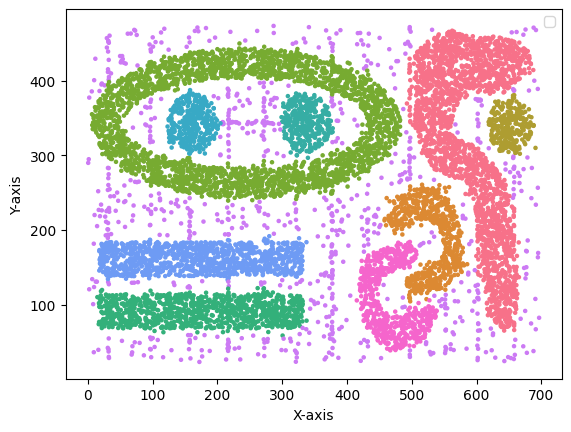

In [18]:
# Plot points with colors based on their class
from matplotlib import pyplot as plt

# for index, row in df.iterrows():
plt.scatter(df['x'], df['y'], s=5, color=colors)

# Add labels and legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

# Show the plot
plt.show()

In [110]:
from rtree import index
import numpy as np


def build_rtree(dataset):
    p = index.Property()
    idx = index.Index(properties=p)
    
    for i, point in enumerate(dataset):
        idx.insert(i, (*point, *point))  # Insert point into the R-tree
    
    return idx

def k_nearest_neighbors(P, k, rtree_index, dataset):
    query_point = (tuple(P) + tuple(P))
    
    # Perform a k-nearest neighbor query and convert the generator to a list
    neighbors_with_point = list(rtree_index.nearest(query_point, k + 1))  # k + 1 to include the point itself
    
    # Manually exclude the point itself from the list
    neighbors = [neighbor for neighbor in neighbors_with_point if (dataset[neighbor] != P).any()]
    
    return neighbors

def get_max_radius(P, neighbors):

    distances = [euclidean_distance(P, neighbor) for neighbor in neighbors]

    return max(distances)

def find_neighbors_circle(P, NeighborhoodRadius, rtree_index, dataset):
    search_box = (tuple(P-NeighborhoodRadius) + tuple(P+NeighborhoodRadius)) 
    
    # Perform a range query to find neighbors within the circular radius
    neighbors = [i for i in rtree_index.intersection(search_box) if euclidean_distance(P, dataset[i]) <= NeighborhoodRadius and (dataset[i] != P).any()]
    
    return neighbors

def R_kNN(dataset, point, k):
    rtree_index = build_rtree(dataset)

    k_neighbors = k_nearest_neighbors(point, k, rtree_index, dataset)

    max_radius = get_max_radius(point, dataset[k_neighbors])

    return find_neighbors_circle(point, max_radius, rtree_index, dataset)


def euclidean_distance(point1, point2):
    return np.linalg.norm(point1 - point2)

In [11]:
dataset = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [2, 3], [4, 5], [2.5, 3.5]]) # Your dataset
NeighborhoodRadius = 2.0
# rtree_index = build_rtree(dataset)
k = 2
point_P = np.array([3, 4])
# neighbors = find_neighbors_circle(point_P, NeighborhoodRadius, rtree_index, dataset)
# neighbors = k_nearest_neighbors(point_P, k, rtree_index, dataset)
# print(neighbors)

In [112]:
result = R_kNN(dataset, point_P, k)
result

[4, 5, 6]

In [19]:
dataset1 = np.zeros(10, dtype=int)
dataset1[[1,2,3]] += 1
dataset1

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [2]:
from tools import load_dataframe

In [5]:
df = load_dataframe(r'C:\Users\alber\Desktop\MED\data\customer_segmentation.csv')
df2 = load_dataframe(r'C:\Users\alber\Desktop\MED\data\TopGear.csv')
df2

,Maker,Model,Type,Fuel,Price,Cylinders,Displacement,DriveWheel,BHP,Torque,...,ClimateControl,CruiseControl,ElectricSeats,Leather,ParkingSensors,PowerSteering,SatNav,ESP,Verdict,Origin
0,Alfa Romeo,Giulietta,Giulietta 1.6 JTDM-2 105 Veloce 5d,Diesel,21250.0,4.0,1598.0,Front,105.0,236.0,...,standard,standard,optional,optional,optional,standard,optional,standard,6.0,Europe
1,Alfa Romeo,MiTo,MiTo 1.4 TB MultiAir 105 Distinctive 3d,Petrol,15155.0,4.0,1368.0,Front,105.0,95.0,...,optional,standard,no,optional,standard,standard,optional,standard,5.0,Europe
2,Aston Martin,Cygnet,Cygnet 1.33 Standard 3d,Petrol,30995.0,4.0,1329.0,Front,98.0,92.0,...,standard,standard,no,no,no,standard,standard,standard,7.0,Europe
3,Aston Martin,DB9,DB9 6.0 517 Standard 2d 13MY,Petrol,131995.0,12.0,5935.0,Rear,517.0,457.0,...,standard,standard,standard,standard,standard,standard,standard,standard,7.0,Europe
4,Aston Martin,DB9 Volante,DB9 6.0 V12 517 Volante 2d 13MY,Petrol,141995.0,12.0,5935.0,Rear,517.0,457.0,...,standard,standard,standard,standard,standard,standard,standard,standard,7.0,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,Volvo,V60,V60 2.4 D5 215 SE 5d,Diesel,30945.0,5.0,2400.0,Front,215.0,309.0,...,standard,standard,no,optional,standard,standard,optional,standard,6.0,Europe
293,Volvo,V70,V70 2.0 D4 163 R-Design 5d,Diesel,31670.0,5.0,1984.0,Front,163.0,295.0,...,standard,standard,no,standard,no,standard,optional,standard,5.0,Europe
294,Volvo,XC60,XC60 2.4 D5 215 AWD R-Design 5d,Diesel,34945.0,5.0,2400.0,4WD,215.0,309.0,...,standard,standard,optional,standard,optional,standard,optional,standard,7.0,Europe
295,Volvo,XC70,XC70 2.0 D3 DRIVe 163 SE Lux 5d,Diesel,33715.0,5.0,1984.0,Front,163.0,295.0,...,standard,standard,standard,standard,standard,standard,standard,standard,6.0,Europe


In [17]:
import pandas as pd

nominal_columns = df.columns[df.dtypes == 'object']

df_encoded = pd.get_dummies(df, columns=nominal_columns, dtype=float)

df_encoded.dropna(inplace=True)
df_encoded.isna().any().any()

False

In [18]:
df_encoded

,Price,Cylinders,Displacement,BHP,Torque,Acceleration,TopSpeed,MPG,Weight,Length,Width,Height,Verdict,Maker_Alfa Romeo,Maker_Aston Martin,Maker_Audi,Maker_BMW,Maker_Bentley,Maker_Bugatti,Maker_Caterham,Maker_Chevrolet,Maker_Chrysler,Maker_Citroen,Maker_Corvette,Maker_Dacia,Maker_Ferrari,Maker_Fiat,Maker_Ford,Maker_Honda,Maker_Hyundai,Maker_Infiniti,Maker_Jaguar,Maker_Jeep,Maker_Kia,Maker_Lamborghini,Maker_Land Rover,Maker_Lexus,Maker_Lotus,Maker_Maserati,Maker_Mazda,...,DriveWheel_Rear,AdaptiveHeadlights_no,AdaptiveHeadlights_optional,AdaptiveHeadlights_standard,AdjustableSteering_no,AdjustableSteering_standard,AlarmSystem_no/optional,AlarmSystem_standard,Automatic_no,Automatic_optional,Automatic_standard,Bluetooth_no,Bluetooth_optional,Bluetooth_standard,ClimateControl_no,ClimateControl_optional,ClimateControl_standard,CruiseControl_no,CruiseControl_optional,CruiseControl_standard,ElectricSeats_no,ElectricSeats_optional,ElectricSeats_standard,Leather_no,Leather_optional,Leather_standard,ParkingSensors_no,ParkingSensors_optional,ParkingSensors_standard,PowerSteering_no,PowerSteering_standard,SatNav_no,SatNav_optional,SatNav_standard,ESP_no,ESP_optional,ESP_standard,Origin_Asia,Origin_Europe,Origin_USA
0,21250.0,4.0,1598.0,105.0,236.0,11.3,115.0,64.0,1385.0,4351.0,1798.0,1465.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,15155.0,4.0,1368.0,105.0,95.0,10.7,116.0,49.0,1090.0,4063.0,1720.0,1446.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,30995.0,4.0,1329.0,98.0,92.0,11.8,106.0,56.0,988.0,3078.0,1680.0,1500.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
5,396000.0,12.0,5935.0,510.0,420.0,4.2,190.0,17.0,1680.0,4385.0,1865.0,1250.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
6,189995.0,12.0,5935.0,573.0,457.0,4.1,183.0,19.0,1739.0,4720.0,1910.0,1294.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,34320.0,5.0,2400.0,215.0,309.0,7.6,143.0,61.0,1671.0,4851.0,1861.0,1493.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
292,30945.0,5.0,2400.0,215.0,309.0,7.5,143.0,61.0,1655.0,4628.0,1865.0,1484.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,

In [19]:
from scipy.spatial import cKDTree
import numpy as np

# Example data: 3D points

# Create a KD-tree index
kdtree = cKDTree(df_encoded)

In [26]:
radius = 1500.0
query_point = df_encoded.iloc[2, :] 
# query_point
# result = kdtree.query_ball_point(query_point, radius)
result = kdtree.query(query_point, 5)
result

(array([   0.        , 1783.03012874, 1850.64794329, 1906.72466812,
        1934.90768772]),
 array([  2,  23,  32,   9, 130], dtype=int64))

In [11]:
from scipy.spatial import cKDTree
import numpy as np

# Example data: 3D points
data = np.array([(1, 2, 3), (4, 5, 6), (7, 8, 9), (10, 11, 12)])

# Create a KD-tree index
kdtree = cKDTree(data)

# Query for points within a distance in 3D space
query_point = (2, 3, 4)  # Query point in 3D space
radius = 15.0
result = kdtree.query_ball_point(query_point, radius)

# Display the result
print("Points within the radius:", result)

Points within the radius: [0, 1, 2, 3]
